<a href="https://colab.research.google.com/github/TANKIANAUN/Machine-Learning/blob/master/CNN_MNIST_fashion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=data.load_data()
print(train_labels[0])

4423680/4422102 [==============================] - 0s 0us/step
9


In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Cost','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

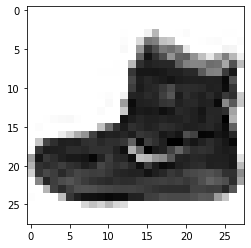

In [ ]:
plt.imshow(train_images[0],cmap=plt.cm.binary)
print(train_images[0])

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5025 - accuracy: 0.8234
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8641
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3379 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8852
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2968 - accuracy: 0.8904
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8957
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2714 - accuracy: 0.8995
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9038
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9071
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('test acc',test_acc,'\ntest_loss',test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8833
test acc 0.8833000063896179 
test_loss 0.36716973781585693


In [ ]:
prediction=model.predict(test_images)
print(prediction)
most_likely=np.argmax(prediction[0])
new=prediction.argmax(axis=1)
print('new ',new)
print("predicted",prediction[0])
print('mostly=',most_likely)
ans=class_names[most_likely]
print(ans)

[[1.7422136e-07 1.8463592e-10 1.3750096e-08 ... 2.4408568e-03
  1.9257924e-10 9.9755633e-01]
 [2.7247608e-05 2.3662361e-15 9.6262556e-01 ... 6.4399172e-26
  3.8660542e-12 5.0505596e-21]
 [1.9205661e-12 1.0000000e+00 1.4213945e-16 ... 2.3207588e-34
  1.5058708e-21 3.3044647e-30]
 ...
 [4.3934818e-08 4.7900962e-18 1.0181598e-07 ... 1.0181159e-13
  9.9999309e-01 1.2385253e-15]
 [1.5350247e-09 9.9999642e-01 6.5694429e-12 ... 2.1672597e-17
  4.2370231e-12 2.8969366e-12]
 [3.9073775e-06 1.2740398e-07 5.7382394e-08 ... 1.9378467e-03
  1.1295978e-04 6.7112887e-07]]
new  [9 2 1 ... 8 1 5]
predicted [1.7422136e-07 1.8463592e-10 1.3750096e-08 2.9513333e-11 2.2807472e-12
 2.5592560e-06 1.1566998e-08 2.4408568e-03 1.9257924e-10 9.9755633e-01]
mostly= 9
Ankle boot


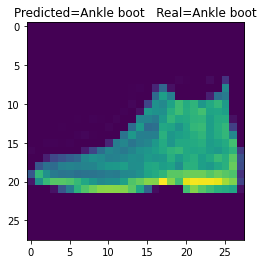

In [ ]:
plt.imshow(test_images[0])
plt.title("Predicted=%s   Real=%s"%(ans,class_names[test_labels[0]]))
plt.show()